In [33]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="whitegrid")
from ydata_profiling import ProfileReport
%matplotlib inline


In [34]:
global_df= pd.read_csv(r"source_csv/global_data.csv")


In [35]:
global_df

,client_id,sex,birth,id_prod,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,10,Vêtements,T-shirts,8.99,88
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,7,Vêtements,T-shirts,16.24,47
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,7,Accessoires,Sacs à main,24.56,29
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,1,Accessoires,Sacs à main,25.99,50
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,6,Vêtements,T-shirts,4.71,37
...,...,...,...,...,...,...,...,...,...,...,...
336890,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337,5,Accessoires,Sacs à main,15.99,62
336891,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701,1,Vêtements,T-shirts,12.51,43
336892,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,3,Vêtements,T-shirts,17.99,38
336893,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845,6,Accessoires,Sacs à main,27.99,12


In [36]:
global_df_profile = ProfileReport(global_df, title="Profile Global")

In [37]:
global_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
#Vérifier les totaux globaux 

In [39]:
print(global_df.isnull().sum())



client_id         0
sex               0
birth             0
id_prod           0
date              0
session_id        0
quantity_sold     0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64


In [40]:
print(global_df[['category', 'quantity_sold']].isnull().sum())


category         0
quantity_sold    0
dtype: int64


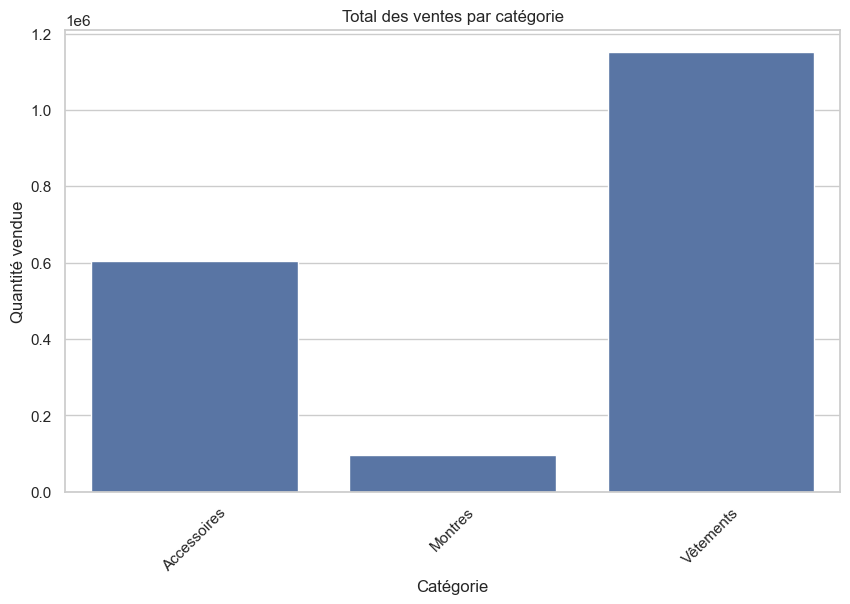

In [41]:
#Analyse des ventes par catégorie 

# Assurez-vous que quantity_sold est numérique
global_df['quantity_sold'] = pd.to_numeric(global_df['quantity_sold'], errors='coerce')

# Calcul du total des ventes par catégorie
ventes_par_categorie = global_df.groupby('category')['quantity_sold'].sum().reset_index()

# Visualisation des ventes par catégorie
plt.figure(figsize=(10, 6))
sns.barplot(data=ventes_par_categorie, x='category', y='quantity_sold')
plt.title("Total des ventes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45)
plt.show()


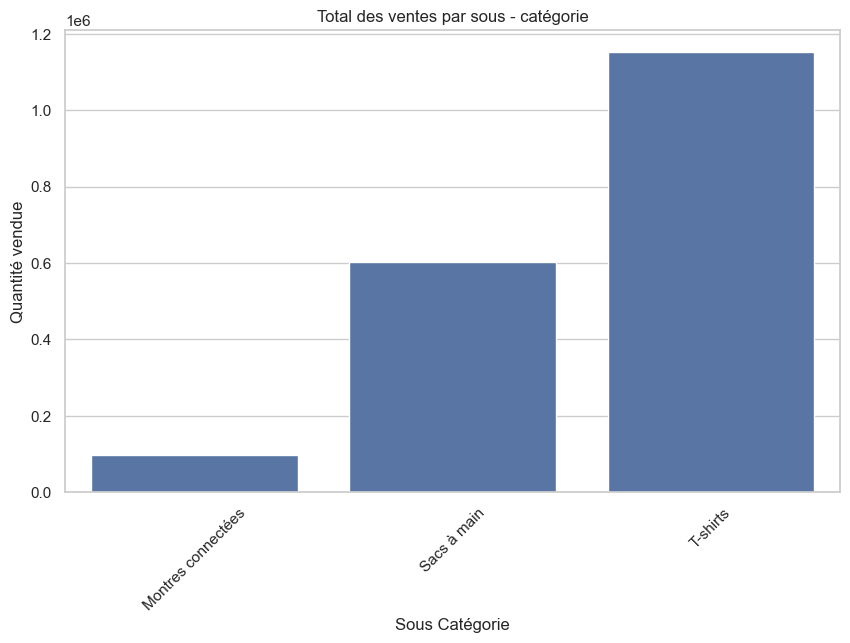

In [42]:
#Analyse des ventes par sous-catégorie 

# Assurez-vous que quantity_sold est numérique
global_df['quantity_sold'] = pd.to_numeric(global_df['quantity_sold'], errors='coerce')

# Calcul du total des ventes par catégorie
ventes_par_categorie = global_df.groupby('sub_category')['quantity_sold'].sum().reset_index()

# Visualisation des ventes par catégorie
plt.figure(figsize=(10, 6))
sns.barplot(data=ventes_par_categorie, x='sub_category', y='quantity_sold')
plt.title("Total des ventes par sous - catégorie")
plt.xlabel("Sous Catégorie")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45)
plt.show()


In [43]:
#Analyse temporelle des ventes , explorer comment les ventes évoluent au fil du temps, il faut d'abord convertir la colonne date en datetime 

In [46]:
# Vérification de la présence de T_O dans id_prod
contains_T_O = global_df['id_prod'].str.startswith('T_O').any()

# Affichage du résultat
if contains_T_O:
    print("Il existe des identifiants qui commencent par 'T_O'.")
else:
    print("Aucun identifiant ne commence par 'T_O'.")

Aucun identifiant ne commence par 'T_O'.


In [ ]:
# Extraire des éléments de date pour une analyse plus facile
global_df['year'] = global_df['date'].dt.year
global_df['month'] = global_df['date'].dt.month

# Total des ventes par mois
ventes_par_mois = global_df.groupby(['year', 'month'])['quantity_sold'].sum().reset_index()

# Visualisation des ventes par mois
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventes_par_mois, x='month', y='quantity_sold', hue='year', marker='o')
plt.title("Tendances des ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Quantité vendue")
plt.xticks(range(1, 13))
plt.show()